In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
sim_data = './sim_data.csv' # 데이터 넣기
df = pd.read_csv(sim_data, encoding = 'CP949')
df

,width,shift
0,1232,49.9000
1,1232,49.8000
2,1232,49.8000
3,1274,49.7500
4,1274,49.7000
5,1244,-0.4000
6,1244,-0.4000
7,1244,-0.4000
8,1244,-0.4000
9,1244,-0.5000


In [4]:
# 초기 Data
WrLen = 2350 # 3000으로 하고 
WrDia = 640
initCrown = 0 # 130 -20 250
taper_L = 700
taper_H = 250
wear_gain = 1.1 # 마모 gain
edge_gain = 1
thermal_gain = 1

In [33]:
# profile 초기화

# initial Crown Profile 초기화
init_prof_T = np.zeros(WrLen)
init_prof_B = np.zeros(WrLen)

# Taper에 의한 Profile 초기화
taper_prof_B = np.zeros(WrLen)
taper_prof_T = np.zeros(WrLen)

taper_x0 = WrLen - taper_L

# wear crown에 의한 Profile 초기화
wear_prof_T = np.zeros(WrLen)
wear_prof_B = np.zeros(WrLen)

unit_wear = 3.5 * wear_gain # 실측 마모량과 보정이 필요함
unit_wear *= wear_gain

emm = 3.95 * edge_gain # edge 마모량
eml = 50 # edge 마모 적용 길이

# Simulation 매수
sim_mesu = len(df)
myshift = np.zeros(sim_mesu)

# total WR profile
total_prof_T = np.zeros(WrLen)
total_prof_B = np.zeros(WrLen)

# strip profile - crown
strip_prof = np.zeros(WrLen)

# criteria
                  
height = total_prof_T[strip_start+1] - total_prof_B[strip_start+1]

In [36]:
# simulation code

for j in range(sim_mesu):
    strwidth = df['width'][j]
    myshift = df['shift'][j]
    
    wear_start_x = int((WrLen - strwidth) / 2 + myshift)
    wear_end_x = int(WrLen - ((WrLen - strwidth) / 2 - myshift))
    
    strip_start = int((WrLen - df['width'][j])/2)
    strip_end = int(WrLen - strip_start)
    
    for i in range(WrLen):
        
        init_prof_B[i] = 4 * initCrown / (WrLen ** 2) * i * (WrLen - i)
        
        if taper_L > 0:
            if i < taper_x0:
                taper_prof_B[i] = 0
            else:
                taper_prof_B[i] = - taper_H / taper_L * j
        
        if i >= wear_start_x and i <= wear_end_x:
            if i < (wear_start_x + eml):
                wgain_edge = (unit_wear - emm) / eml * (i - wear_start_x) + (emm - unit_wear)
            elif i > (wear_end_x - eml):
                wgain_edge = (unit_wear - emm) / eml * (wear_start_x - i) + (emm - unit_wear)
            
            wgain_center = (-0.8) / (strwidth ** 2) * ((i - wear_start_x) ** 2) + 0.8 / strwidth * (i - wear_start_x) + 1
            wear_prof_B[i] = wear_prof_B[i] - unit_wear * wgain_center - wgain_edge
            
        total_prof_B[i] = wear_prof_B[i] * 0.7 + taper_prof_B[i] + init_prof_B[i]
        total_prof_T[i] = - total_prof_B[WrLen - i - 1]
        
        if i < strip_start:
            strip_prof[i] = 0
        elif i > strip_end:
            strip_prof[i] = 0
        else:
            strip_prof[i] = total_prof_T[i] - total_prof_B[i]

In [37]:
WL = np.arange(1, 2351)

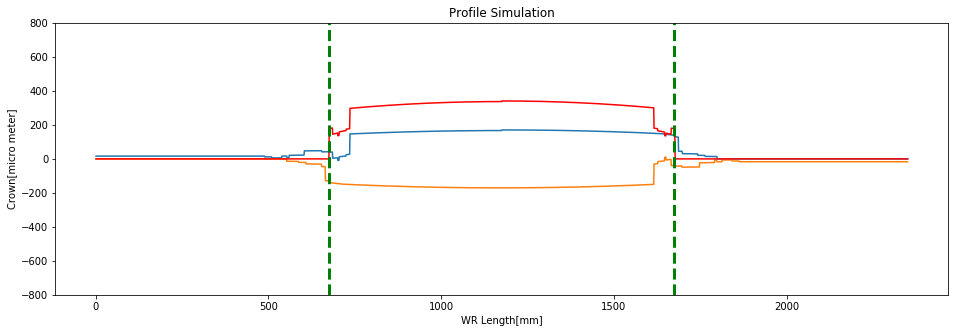

In [41]:
plt.rcParams['figure.figsize'] = [16,5]
t_wr_prof_fig = plt.figure()
ax = t_wr_prof_fig.add_subplot(1, 1, 1)
plt.title("Profile Simulation")
plt.xlabel('WR Length[mm]')
plt.ylabel('Crown[micro meter]')
plt.ylim(-800, 800)
ax.plot(WL, total_prof_T)
ax.plot(WL, total_prof_B)
ax.plot(WL, strip_prof*1, 'r')
plt.axvline(x=strip_start, color='g', linestyle='--', linewidth=3)
plt.axvline(x=strip_end, color='g', linestyle='--', linewidth=3)
#plt.fill_between(WL, total_prof_T, np.max(total_prof_T), facecolor='gray',alpha=0.5)
#plt.fill_between(WL, total_prof_B, np.max(total_prof_T), facecolor='gray',alpha=0.5)
# plt.fill_betweenx(WL, strip_start, strip_end, color='yellow',alpha=0.5)
plt.show()

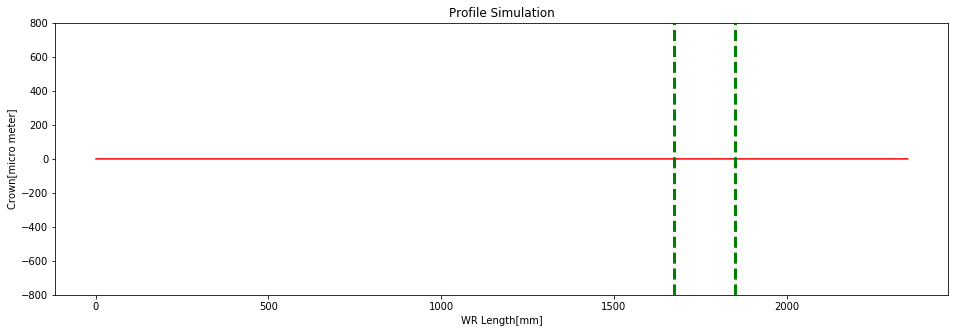

In [13]:
plt.rcParams['figure.figsize'] = [16,5]
t_wr_prof_fig = plt.figure()
ax = t_wr_prof_fig.add_subplot(1, 1, 1)
plt.title("Profile Simulation")
plt.xlabel('WR Length[mm]')
plt.ylabel('Crown[micro meter]')
plt.ylim(-800, 800)
#ax.plot(WL, total_prof_T)
#ax.plot(WL, total_prof_B)
ax.plot(WL, strip_prof*1, 'r')
plt.axvline(x=strip_start, color='g', linestyle='--', linewidth=3)
plt.axvline(x=strip_end, color='g', linestyle='--', linewidth=3)
# plt.fill_between(WL, total_prof_T, np.max(total_prof_T), facecolor='gray',alpha=0.5)
# plt.fill_between(WL, total_prof_B, np.max(total_prof_T), facecolor='gray',alpha=0.5)
# plt.fill_betweenx(WL, strip_start, strip_end, color='yellow',alpha=0.5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [ ]:
# Initializtion total WR profile
total_prof_T = np.zeros(WrLen)
total_prof_B = np.zeros(WrLen)

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim = (0,WrLen), ylim = (-800, 2800))

line, = ax.plot([],[],lw=2, animated=True, label='Predicted')
line1, = ax.plot([],[],lw=2, alpha=0.7, animated=True, label='Filtered', color='tab:orange')
line2, = ax.plot([],[],lw=2, alpha=0.2, animated=True, color = 'tab.red',label='Unfiltered')

def init():
    
    line.set_data([],[])
    line1.set_data([],[])
    line2.set_data([],[])
    return line, line1, line2,

def animate(j):
    
    strwidth = df['width'][j]
    myshift = df['shift'][j]
    
    wear_start_x = int((WrLen - strwidth) / 2 + myshift)
    wear_end_x = int(WrLen - ((WrLen - strwidth) / 2 - myshift))
    
    for i in range(WrLen):
        init_prof_B[i] = 4 * initCrown / (WrLen ** 2) * i * (WrLen - i)
        
        if taper_L > 0:
            if i < taper_x0:
                taper_prof_B[i] = 0
            else:
                taper_prof_B[i] = - taper_H / taper_L * j
        
        if i >= wear_start_x and i <= wear_end_x:
            if i < (wear_start_x + eml):
                wgain_edge = (unit_wear - emm) / eml * (i - wear_start_x) + (emm - unit_wear)
            elif i > (wear_end_x - eml):
                wgain_edge = (unit_wear - emm) / eml * (wear_start_x - i) + (emm - unit_wear)
            
            wgain_center = (-0.8) / (strwidth ** 2) * ((i - wear_start_x) ** 2) + 0.8 / strwidth * (i - wear_start_x) + 1
            wear_prof_B[i] = wear_prof_B[i] - unit_wear * wgain_center - wgain_edge
            
        total_prof_B[i] = wear_prof_B[i] * 0.7 + taper_prof_B[i] + init_prof_B[i]
        total_prof_T[i] = - total_prof_B[WrLen - i - 1]
        
        if i < strip_start:
            strip_prof[i] = 0
        elif i > strip_end:
            strip_prof[i] = 0
        else:
            strip_prof[i] = total_prof_T[i] - total_prof_B[i] - height
    
    x = WL
    y = total_prof_T
    y1 = total_prof_B
    y2 = strip_prof
    print(total_prof_T[1000])
    line.set_data(x,y)
    line1.set_data(x,y1)
    line2.set_data(x,y2)
    v1 = plt.axvline(x=strip_start, color='g', linestyle='--',linewidth=3)
    v2 = plt.axvline(x=strip_end, color='g', linestyle='--',linewidth=3)
    p = plt.fill_between(WL[strip_start,strip_end],total_prof_T[strip_start,strip_end],total_prof_B[strip_start,strip_end],facecolor='red',alpha=0.5)
    return line, line1, line2, v1, v2, p,

anim = animation.FuncAnimation(fig,animate, init_func = init, frames =91, interval = 20, blit = True, repeat = False)
plt.show()